In [1]:
import matplotlib.pyplot as plt

from getConfig import getConfig
from checkStationary  import checkStationary

In [2]:
def checkAR(ts):
    for x in range(1,13):
        ar = ts.autocorr(lag=x)
        if ar > 0.5:
            print("{:>12}{:>12.2f}".format(x,ar))

In [12]:
def analyzeCol(col, ts):
    print(col)
    checkAR(ts)
    stationary = checkStationary(ts, "10%")
    stationary = True
    print("       Stationary") if stationary else print("        Not Stationary")

In [13]:
config = getConfig()
df = pd.read_csv(config["dataLoc"]+config["fileName"])

In [14]:
print("{:>12}{:>18}".format("Lag", "AR correlation"))
for col in ["Volume", "Revenue"]:
    ts = df[col]
    analyzeCol(col, ts)

         Lag    AR correlation
Volume
           3        0.77
           6        0.82
           9        0.66
          12        0.76
       Stationary
Revenue
           3        0.77
           6        0.81
           9        0.68
          12        0.83
       Stationary


In [26]:
Vpct = df["Volume"].pct_change()
Rpct = df["Revenue"].pct_change()

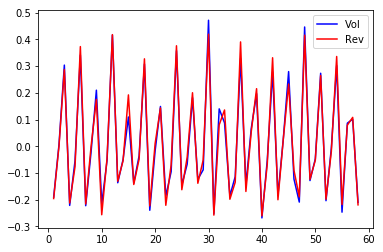

In [34]:
plt.plot(Vpct, label="Vol", c="b")
plt.plot(Rpct, label="Rev", c="r")
plt.legend()